### 허깅페이스 2
어제 간단하게 stable diffusion으로 작동하는지 확인해봤다.     
집에있는 gpu 메모리가 한정적이라서 cpu로 돌렸고 많은 step을 주지않아서 완벽하지 않았다.     
다음에 라이트한 모델을 가지고 실험해볼 예정이고, 오늘은 허깅페이스 튜토리얼에서 제대로 하나하나 알아보자

#### pipeline사용하기
pipeline()을 사용하면 언어, 비전, 오디오 및 멀티모달 태스트에 대한 추론을 위해 hub의 어떤 모델이던지 쉽게 사용할 수 있다.    
모델을 구축하는 방법 또한 좋지만 파인튜닝을 해서 사용할 경우에는 주로 이렇게 사용한다.     
각 태스크마다 고유의 pipeline()이 있지만 개별 파이프라인을 담고 있는 추상화된 pipeline()을 사용하는 것이 일반적으로 더 간단하다고 한다.     
pipeline은 태스크에 알맞게 추론이 가능한 기본 모델과 전처리 클래스를 자동으로 로드한다.     

1) 먼저 pipeline()을 생성하고 태스크를 지정한다.    

In [1]:
from transformers import pipeline

generator = pipeline(task="automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

c:\Users\HOME\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HOME\.cache\huggingface\hub\models--facebook--wav2vec2-base-960h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

KeyboardInterrupt: 

2) 그리고 pipeline에 입력을 넣어준다.

In [ ]:
import ffmpeg
ffmpeg.__path__

['C:\\Users\\BIG3-09\\AppData\\Roaming\\Python\\Python311\\site-packages\\ffmpeg']

In [ ]:
generator("./mlk.flac")

{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'}

### 이렇게 손쉽게 오디오 파일을 text로 변환했다 !
다음과 같이 여러개의 입력을 리스트 형태로 전달할 수도 있다.

In [ ]:
generator(
    [
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac",
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac",
    ]
)

[{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'},
 {'text': 'HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOWER FAT AND SAUCE'}]

이외에 전체 데이터셋을 순회하거나 웹서버에 올려두고 추론을 하게 할 수도 있다.     
하지만 웹에서 사용하기에 너무 큰애들이 많지 않을까 싶다.     

### 매개변수
pipeline의 많은 매개변수를 살펴보자    
특정 태스크용도 있고 범용도 있다.

In [ ]:
model = pipeline(model = "openai/whisper-small")

In [ ]:
out = model(inputs='./mlk.flac',batch_size=16)
print(out)

{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}


In [ ]:
out = model(inputs='./mlk.flac',batch_size=32)
print(out)

{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}


In [ ]:
out = model(inputs='./mlk.flac',batch_size=2048)
print(out)

{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}


### device를 설정해줄 수 있다.
```python
model = pipeline(model ... , device = 0)
model = pipeline(model ... , device_map = 'auto')
```     

아래에 있는 코드는 gpu하나에 돌아가기 버겁다면 auto로 지정해줘서 accelerate가 모델의 가중치를 어떻게 로드하고 저장할지 자동으로 결정하게 할 수 있다.

### AutoClass 로 사전 학습된 인스턴스 로드하기
트랜스포머 아키텍처가 매우 다양하기 때문에 체크포인트에 맞는 아키텍처를 생성하는 것이 어려울 수 있다.    
AutoClass는 주어진 체크포인트에서 올바른 아키텍처를 자동으로 추론하고 로드한다.     
from_pretrained() 메서드를 사용하면 쉽게 사전학습된 모델을 로드할 수 있어서 처음부터 학습하는데 시간과 자원을 투자할 필요가 없다.     

In [ ]:
from transformers import AutoTokenizer 
model = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

In [ ]:
text = "In a hole in the ground there lived a hobbit"

print(model(text))

{'input_ids': [101, 1999, 1037, 4920, 1999, 1996, 2598, 2045, 2973, 1037, 7570, 10322, 4183, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
print(model(text="한글도 되는지 확인"))

{'input_ids': [101, 1469, 30006, 30021, 29991, 30017, 30022, 29993, 30011, 100, 1469, 30012, 30020, 29999, 30019, 30021, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


### 전처리
모델을 훈련하려면 데이터 세트를 모델에 맞는 입력 형식으로 전처리해야한다. (당연한 말 !)    
데이터를 텐서로 배치하고 조립해야하는데 transformers는 데이터를 준비하는 데 도움이 되는 일련의 전처리 클래스를 제공한다.     
텍스트는 Tokenizer    
음성 및 오디오는 Feature extractor    
이미지 입력은 ImageProcessor    
멀티모달 입력은 Processor를 사용해서 사용한다.    
AutoProcessor는 언제나 작동하며, 토크나이저, 이미지 프로세서, 특성 추출기, 프로세서 등 사용중인 모델에 맞는 클래스를 설정해준다.    

텍스트 모델이 가장 가볍기 때문에 텍스트를 전처리해보자. 위에서 총 3가지를 반환했는데, input_ids는 각 토큰에 해당하는 인덱스, attention_mask는 토큰을 처리해야 하는지 여부를, token_type_ids는 두개 이상의 시퀀스가 있을 때 토큰이 속한 시퀀스를 반환한다.     

In [ ]:
encoded_input = model(text=["한글도 되는지 확인","여러 문장으로 해보자"],padding=True,return_tensors='pt')

print(encoded_input)

{'input_ids': tensor([[  101,  1469, 30006, 30021, 29991, 30017, 30022, 29993, 30011,   100,
          1469, 30012, 30020, 29999, 30019, 30021,   102,     0,     0,     0,
             0,     0],
        [  101,  1463, 30010, 29994, 30008,  1459, 30014, 30021, 30000, 30006,
         30025, 29999, 30017, 29994, 30011,  1469, 30007, 29996, 30011, 30000,
         30006,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [2]:
# 비전 전처리하고 넣기
from datasets import load_dataset
dataset = load_dataset("food101",split="train[:100]")

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

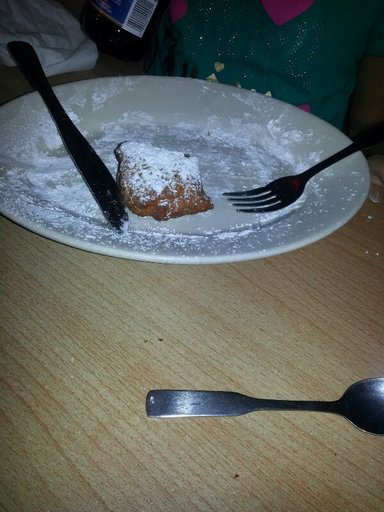

In [3]:
dataset[0]["image"]

In [4]:
#AutoImageProcessor.from_pretrained()로 이미지 프로세서 가져오기
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

c:\Users\HOME\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HOME\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

In [5]:
#전처리 과정에서 이미지 증강 처리하기 ! torchvision으로 증강한다.
#데이터 증강은 모델의 과적합 가능성을 낮춰줘서 일반화 능력을 강화해준다. 여러가지 논문들에서 정확도 또한 상승한다는 결과가 있다.
from torchvision.transforms import RandomResizedCrop,ColorJitter,Compose
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

In [6]:
_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])


In [7]:
print(_transforms) #증강된 데이터를 확인할 수 있다. 

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
    ColorJitter(brightness=(0.5, 1.5), contrast=None, saturation=None, hue=(-0.5, 0.5))
)


In [8]:
# 모델은 입력으로 pixel_values를 받는다. ImageProcessor는 이미지 정규화 및 적절한 텐서 생성을 처리할 수 있다.
# 배치 이미지에 대한 이미지 증강 및 이미지 전처리를 결합하고 pixel_values를 생성하는 함수를 만들자.
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images,do_resize=False,return_tensor = 'pt')["pixel_values"]
    return examples

In [9]:
#위의 예에서 이미지 증강 중 이미지 크기를 조정했기 때문에 do_resize False
#증강 변환 과정에서 이미지를 정규화하려면 image_processor.image_mean 및 image_std를 사용하자

#datasets의 set_transform을 사용해서 실시간으로 변환을 적용한다.
dataset.set_transform(transforms)

In [11]:
dataset[0].keys() #pixel_values가 추가된 것을 볼 수 있다.
#이를 통해서 처리된 데이터를 모델에 전달할 수 있다 !

dict_keys(['image', 'label', 'pixel_values'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.9843137  -0.9843137  -0.99215686 ... -0.9372549  -0.94509804
   -0.9529412 ]
  [-0.9843137  -0.9843137  -0.99215686 ... -0.94509804 -0.9529412
   -0.96862745]
  [-0.99215686 -0.99215686 -0.99215686 ... -0.96862745 -0.9764706
   -0.9764706 ]
  ...
  [-0.26274508  0.10588241  0.4901961  ... -0.14509803  0.2941177
    0.5764706 ]
  [-0.15294117 -0.05882353  0.06666672 ...  0.18431377  0.45098042
    0.6156863 ]
  [-0.03529412 -0.1607843  -0.25490195 ...  0.41176474  0.5372549
    0.60784316]]

 [[-0.9607843  -0.9607843  -0.9607843  ... -0.654902   -0.6627451
   -0.67058825]
  [-0.9607843  -0.9607843  -0.9607843  ... -0.6627451  -0.67058825
   -0.6784314 ]
  [-0.96862745 -0.96862745 -0.9529412  ... -0.6862745  -0.6784314
   -0.6862745 ]
  ...
  [-0.3098039   0.05098045  0.4431373  ... -0.0745098   0.36470592
    0.67058825]
  [-0.21568626 -0.1372549  -0.02745098 ...  0.27058828  0.5372549
    0.70980394]
  [-0.12156862 -0.27058822 -0.3490196  ...  0.5058824   0.6313726
    0.7019608 

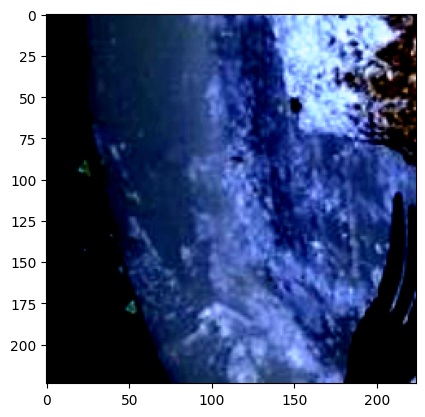

In [16]:
import numpy as np
import matplotlib.pyplot as plt
img = dataset[0]["pixel_values"]
print(img)
plt.imshow(img.T)